In [1]:
import pandas as pd
bank_churn = pd.read_csv("Bank_churn.csv")

In [2]:
bank_churn.head(5)

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Rating,Exited,"Geography:str,Gender:str"
0,0.0,15674932.0,"O,k{wudilic_-huk>wu_",668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,-3,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
1,1.0,15749177.0,"O{kwudi""li#%%'oli=-sa",627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.5,0,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
2,2.0,15694510.0,Hsueh,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,1,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
3,3.0,15741417.0,"Kao,]?>?%]@",581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,-4,0,"{'Geography': 'Paris-France','Gender': 'Male'}"
4,4.0,15766172.0,Ch-i]emen'-am,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,-1,0,"{'Geography': 'Madrid-Spain','Gender': 'Male'}"


In [5]:
bank_churn.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Rating', 'Exited', 'Geography:str,Gender:str'],
      dtype='object')

In [41]:
discover_column = bank_churn[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]]

In [42]:
discover_column.describe()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
count,164664.000000,160327.000000,160993.000000,159513.000000,162191.000000,161509.000000
mean,656.464710,5.022304,55497.937398,1.554745,0.753944,0.497675
std,80.103353,2.806686,62808.409912,0.547085,0.430713,0.499996
min,350.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,597.000000,3.000000,0.000000,1.000000,1.000000,0.000000
50%,659.000000,5.000000,0.000000,2.000000,1.000000,0.000000
75%,710.000000,7.000000,119960.290000,2.000000,1.000000,1.000000
max,850.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [43]:
discover_column['Age'].value_counts()

Age
38.0              8897
37.0              8872
35.0              8755
34.0              8270
36.0              8239
                  ... 
-41000.0             1
60.0 years old       1
-2300.0              1
35.0 ans et          1
29.0 years old       1
Name: count, Length: 500, dtype: int64

In [ ]:
value_counts = discover_column['Age'].value_counts()
value_to_remove = value_counts[value_counts <10].index
discover_column['Age'] = discover_column['Age'].apply(lambda x: 0 if x in value_to_remove else x)
discover_column['Age'] = discover_column['Age'].astype('float')
discover_column.info()

In [55]:
discover_column.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
count,164664.000000,159435.000000,160327.000000,160993.000000,159513.000000,162191.000000,161509.000000
mean,656.464710,37.878778,5.022304,55497.937398,1.554745,0.753944,0.497675
std,80.103353,9.333480,2.806686,62808.409912,0.547085,0.430713,0.499996
min,350.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000
75%,710.000000,42.000000,7.000000,119960.290000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [56]:
discover_column['Age'].corr(discover_column['IsActiveMember'])

np.float64(0.0027677672225911642)

<Axes: >

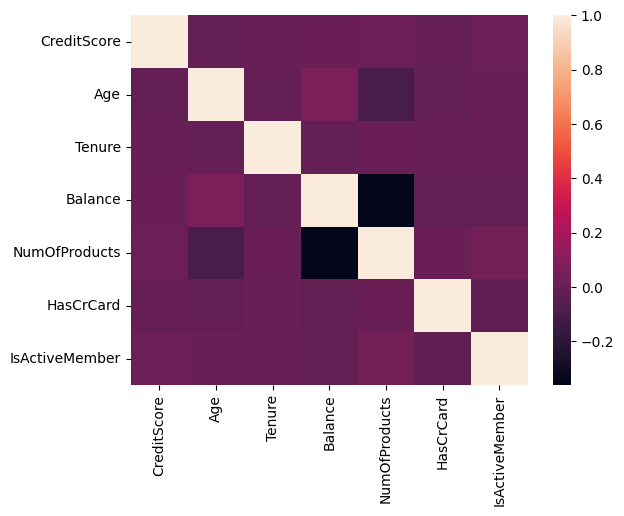

In [62]:
import seaborn as sns
sns.heatmap(discover_column.corr())


In [63]:
discover_column.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
CreditScore,1.000000,-0.008039,0.001450,0.006658,0.011390,-0.002631,0.015125
Age,-0.008039,1.000000,-0.008901,0.061611,-0.096414,-0.011685,0.002768
Tenure,0.001450,-0.008901,1.000000,-0.009579,0.006627,0.005581,-0.004524
Balance,0.006658,0.061611,-0.009579,1.000000,-0.361201,-0.018918,-0.015732
NumOfProducts,0.011390,-0.096414,0.006627,-0.361201,1.000000,0.006687,0.039601
HasCrCard,-0.002631,-0.011685,0.005581,-0.018918,0.006687,1.000000,-0.020943
IsActiveMember,0.015125,0.002768,-0.004524,-0.015732,0.039601,-0.020943,1.000000


In [60]:
discover_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CreditScore     164664 non-null  float64
 1   Age             159435 non-null  float64
 2   Tenure          160327 non-null  float64
 3   Balance         160993 non-null  float64
 4   NumOfProducts   159513 non-null  float64
 5   HasCrCard       162191 non-null  float64
 6   IsActiveMember  161509 non-null  float64
dtypes: float64(7)
memory usage: 8.8 MB


In [59]:
discover_column = discover_column.drop('EstimatedSalary', axis=1)